<a href="https://colab.research.google.com/github/bida22-070/BIDA22-070/blob/main/Week9_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Exercise 2: Install required libraries

# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import fetch_california_housing, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

All libraries imported successfully!
TensorFlow version: 2.19.0
Keras version: 3.10.0


EXERCISE 3: CALIFORNIA HOUSING DATASET EDA
1. Dataset Overview:
----------------------------------------
Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



2. Summary Statistics:
----------------------------------------


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



3. Pairwise Correlation Heatmap:
----------------------------------------


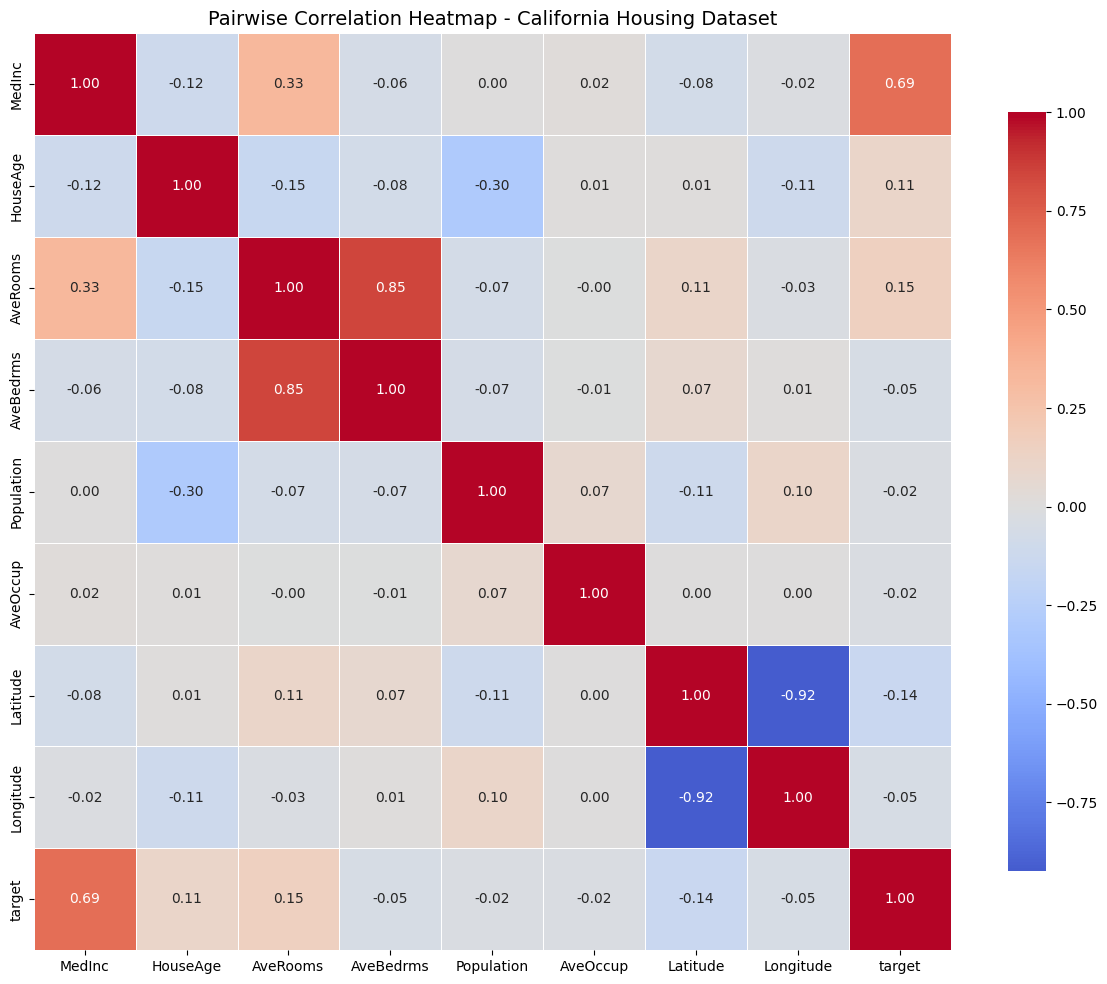


4. Distribution of Target Variable:
----------------------------------------


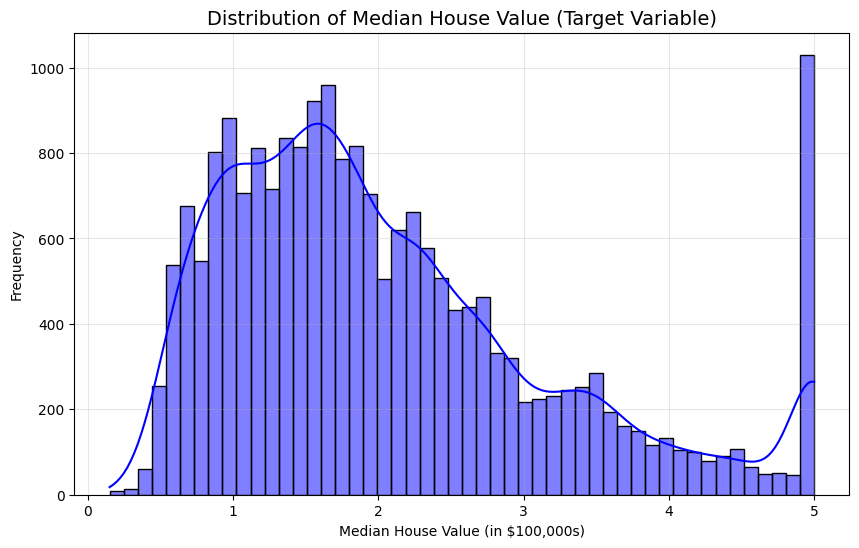


5. Feature Relationships with Target:
----------------------------------------


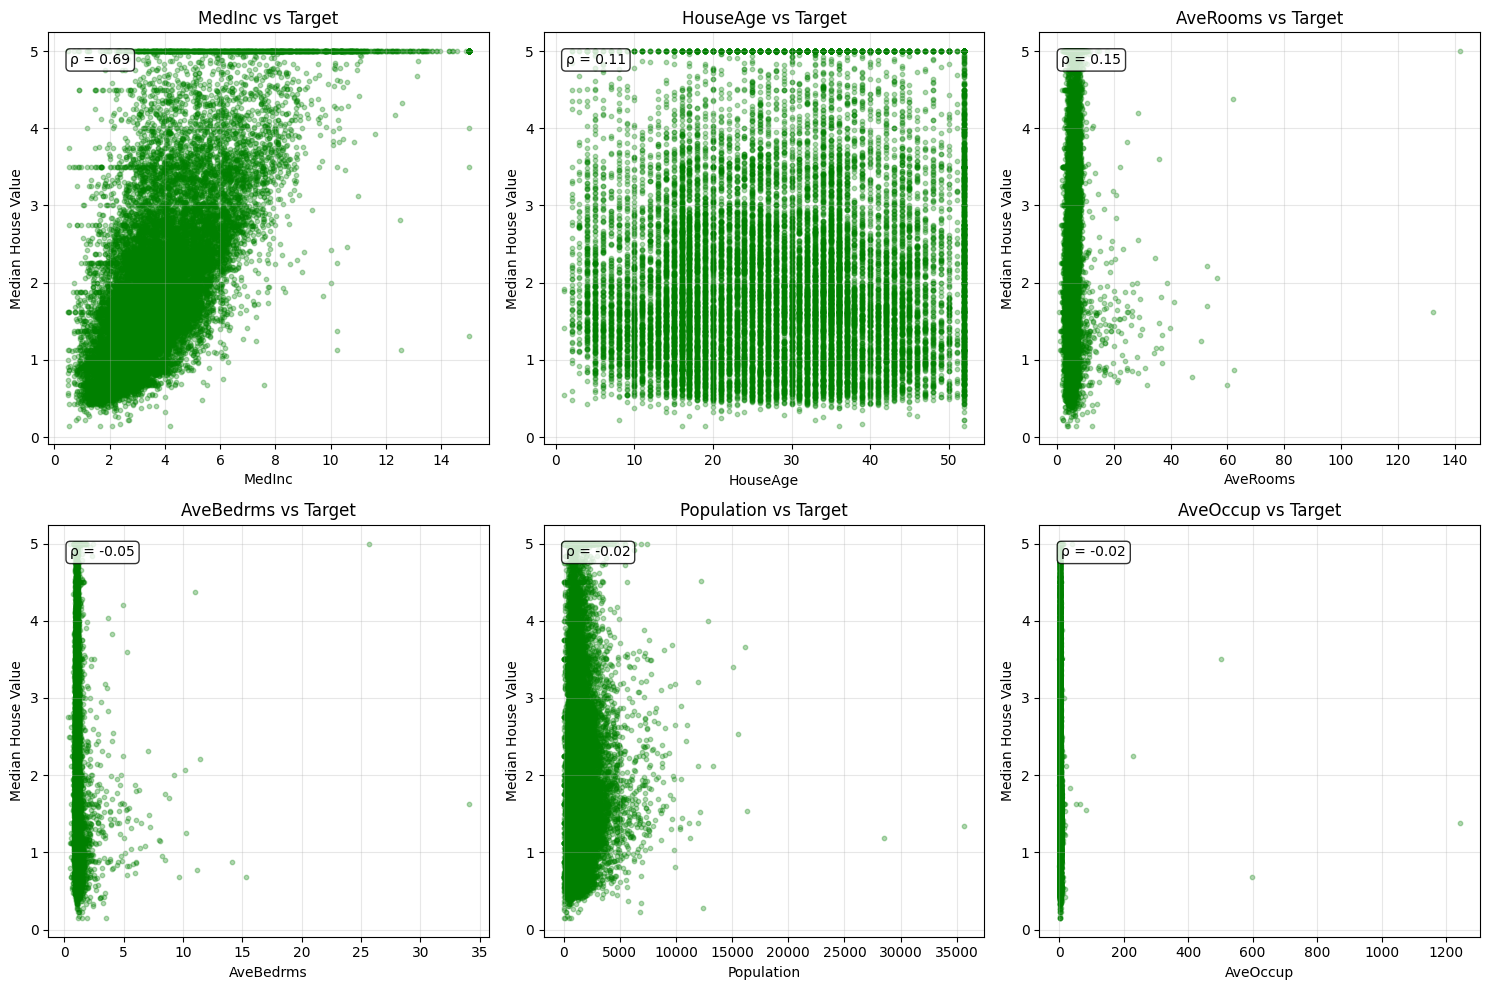


Key Observations from EDA:
1. MedInc (median income) shows the strongest positive correlation with house value
2. Latitude and Longitude show moderate correlation (geographic location matters)
3. AveRooms and AveBedrms are highly correlated (expected)
4. Target variable is right-skewed (most houses are in lower price ranges)
5. Some features may require scaling for neural network training


In [7]:
# Exercise 3: Exploratory Data Analysis on California Housing Dataset
print("EXERCISE 3: CALIFORNIA HOUSING DATASET EDA")
print("=" * 60)

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']],
                    columns=list(california_housing['feature_names']) + ['target'])

print("1. Dataset Overview:")
print("-" * 40)
print(f"Dataset shape: {data.shape}")
print(f"Features: {list(data.columns)}")
print(f"\nFirst 5 rows:")
display(data.head())

print("\n2. Summary Statistics:")
print("-" * 40)
display(data.describe())

print("\n3. Pairwise Correlation Heatmap:")
print("-" * 40)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Pairwise Correlation Heatmap - California Housing Dataset', fontsize=14)
plt.tight_layout()
plt.show()

print("\n4. Distribution of Target Variable:")
print("-" * 40)
plt.figure(figsize=(10, 6))
sns.histplot(data['target'], bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Median House Value (Target Variable)', fontsize=14)
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print("\n5. Feature Relationships with Target:")
print("-" * 40)
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].scatter(data[feature], data['target'], alpha=0.3, s=10, color='green')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Median House Value')
    axes[i].set_title(f'{feature} vs Target')
    axes[i].grid(True, alpha=0.3)

    # Add correlation coefficient
    corr = data[feature].corr(data['target'])
    axes[i].text(0.05, 0.95, f'ρ = {corr:.2f}', transform=axes[i].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\nKey Observations from EDA:")
print("1. MedInc (median income) shows the strongest positive correlation with house value")
print("2. Latitude and Longitude show moderate correlation (geographic location matters)")
print("3. AveRooms and AveBedrms are highly correlated (expected)")
print("4. Target variable is right-skewed (most houses are in lower price ranges)")
print("5. Some features may require scaling for neural network training")


EXERCISE 4: MLP REGRESSION
Training set: 12384 samples
Validation set: 4128 samples
Test set: 4128 samples

Training MLP Regressor...
Training time: 10.56 seconds
Validation RMSE: 0.5321
Test RMSE: 0.5352


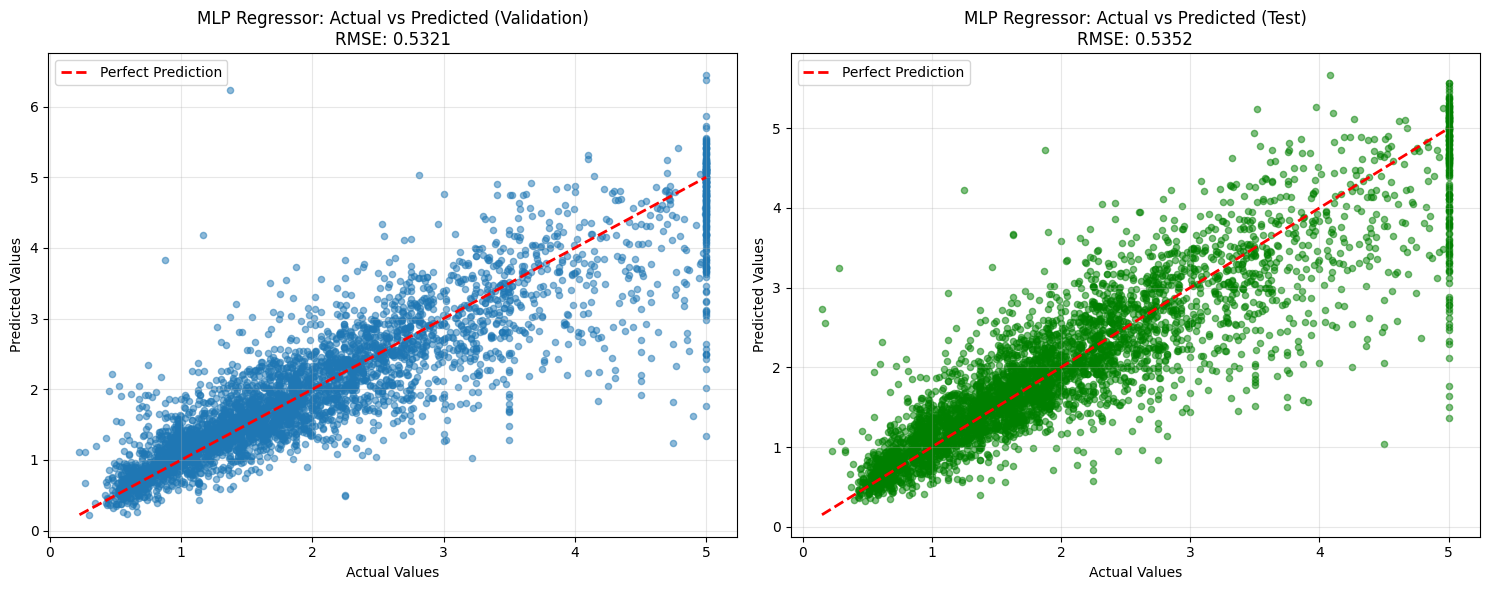

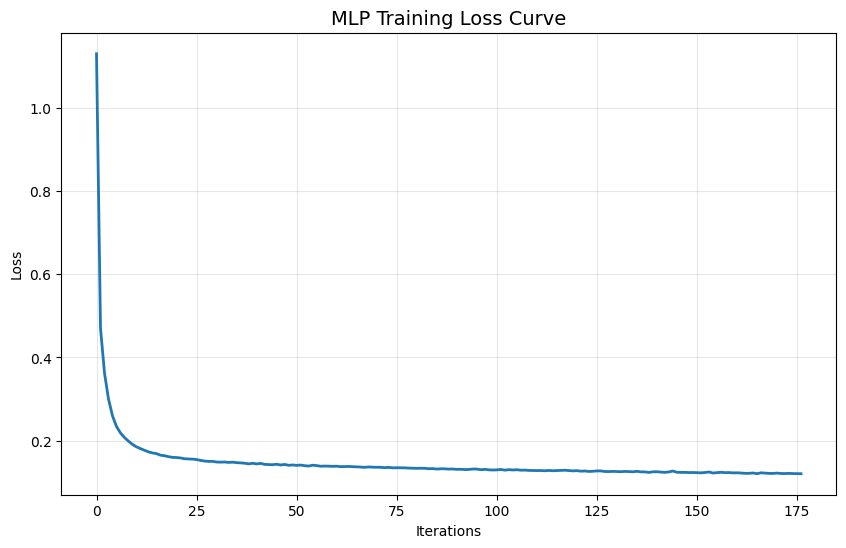

In [8]:
# Exercise 4: MLP Regression for Housing Prices
print("\nEXERCISE 4: MLP REGRESSION")
print("=" * 60)

# Load and split the data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_valid.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Define and train MLP regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=[25, 25, 25],
                      random_state=42,
                      max_iter=500,
                      learning_rate='adaptive')

pipeline = make_pipeline(StandardScaler(), mlp_reg)

print("\nTraining MLP Regressor...")
start_time = time.time()
pipeline.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = pipeline.predict(X_valid)
y_test_pred = pipeline.predict(X_test)

# Calculate RMSE
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training time: {training_time:.2f} seconds")
print(f"Validation RMSE: {rmse_valid:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Validation set predictions
axes[0].plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)],
             linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
axes[0].scatter(y_valid, y_pred, alpha=0.5, s=20)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'MLP Regressor: Actual vs Predicted (Validation)\nRMSE: {rmse_valid:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set predictions
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='green')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'MLP Regressor: Actual vs Predicted (Test)\nRMSE: {rmse_test:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot training loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_reg.loss_curve_, linewidth=2)
plt.title('MLP Training Loss Curve', fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.show()


EXERCISE 5: ANN REGRESSION
Training set: 16512 samples
Test set: 4128 samples

Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,201 (700.00 KB)

 Trainable params: 179,201 (700.00 KB)

 Non-trainable params: 0 (0.00 B)


Training ANN...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training time: 119.58 seconds
Test RMSE: 0.5259


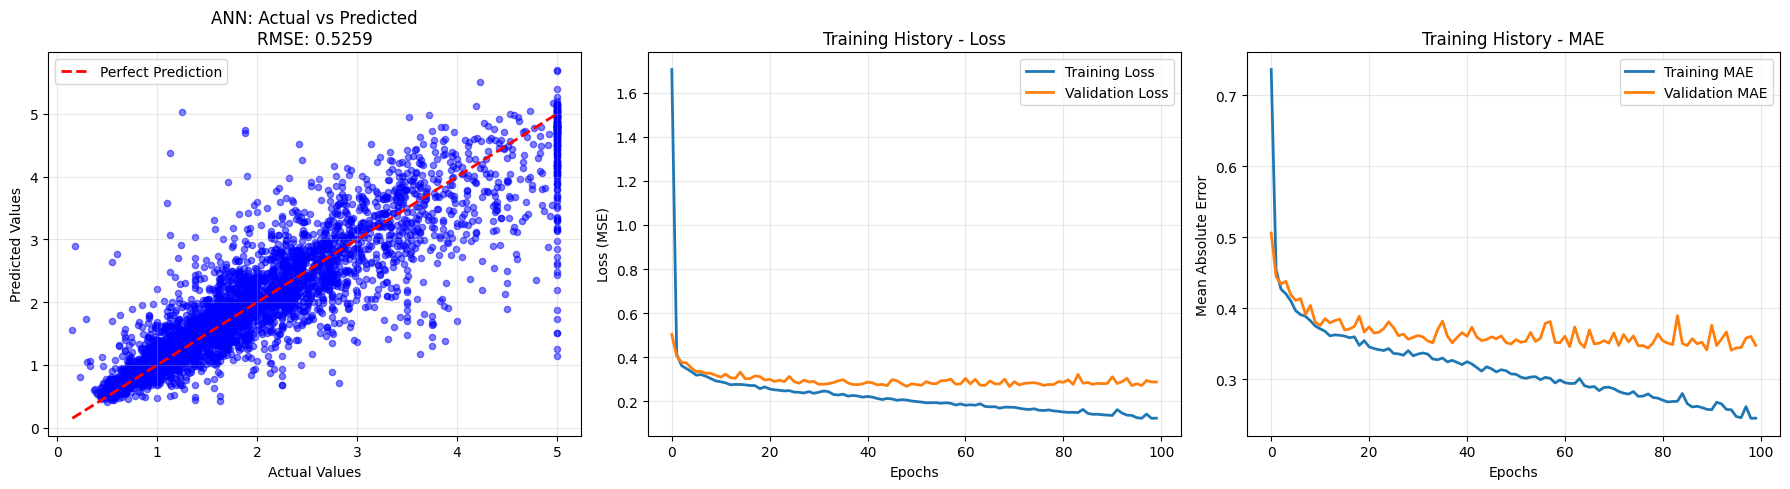

In [9]:
# Exercise 5: ANN Regression for Housing Prices
print("\nEXERCISE 5: ANN REGRESSION")
print("=" * 60)

# Prepare data for ANN
X = data.drop('target', axis=1)
y = data['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape[0]} samples")
print(f"Test set: {X_test_scaled.shape[0]} samples")

# Build ANN model
model = Sequential([
    Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])

print("\nModel Architecture:")
model.summary()

# Train model
print("\nTraining ANN...")
start_time = time.time()
history = model.fit(X_train_scaled, y_train,
                   epochs=100,
                   batch_size=128,
                   validation_split=0.2,
                   verbose=0)
training_time = time.time() - start_time

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Training time: {training_time:.2f} seconds")
print(f"Test RMSE: {rmse:.4f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Actual vs Predicted
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
axes[0].scatter(y_test, y_pred, alpha=0.5, s=20, color='blue')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'ANN: Actual vs Predicted\nRMSE: {rmse:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Training History - Loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].set_title('Training History - Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Training History - MAE
axes[2].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[2].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Mean Absolute Error')
axes[2].set_title('Training History - MAE')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


EXERCISE 6: DATASET SIZE EXPERIMENT

Testing with 30% test size:
------------------------------
Training samples: 14448
Test samples: 6192


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MLP - RMSE: 0.5192, Time: 32.18s
ANN - RMSE: 0.5165, Time: 55.52s

Testing with 50% test size:
------------------------------
Training samples: 10320
Test samples: 10320


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MLP - RMSE: 0.5469, Time: 10.71s
ANN - RMSE: 0.5242, Time: 45.15s

Testing with 70% test size:
------------------------------
Training samples: 6192
Test samples: 14448


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MLP - RMSE: 0.5470, Time: 7.72s
ANN - RMSE: 0.5336, Time: 26.44s

Summary of Results:
 Test Size  Train Samples  Test Samples  MLP RMSE  MLP Time  ANN RMSE  ANN Time
       0.3          14448          6192  0.519211 32.175615  0.516477 55.520303
       0.5          10320         10320  0.546934 10.706328  0.524157 45.146535
       0.7           6192         14448  0.546994  7.724339  0.533611 26.444479


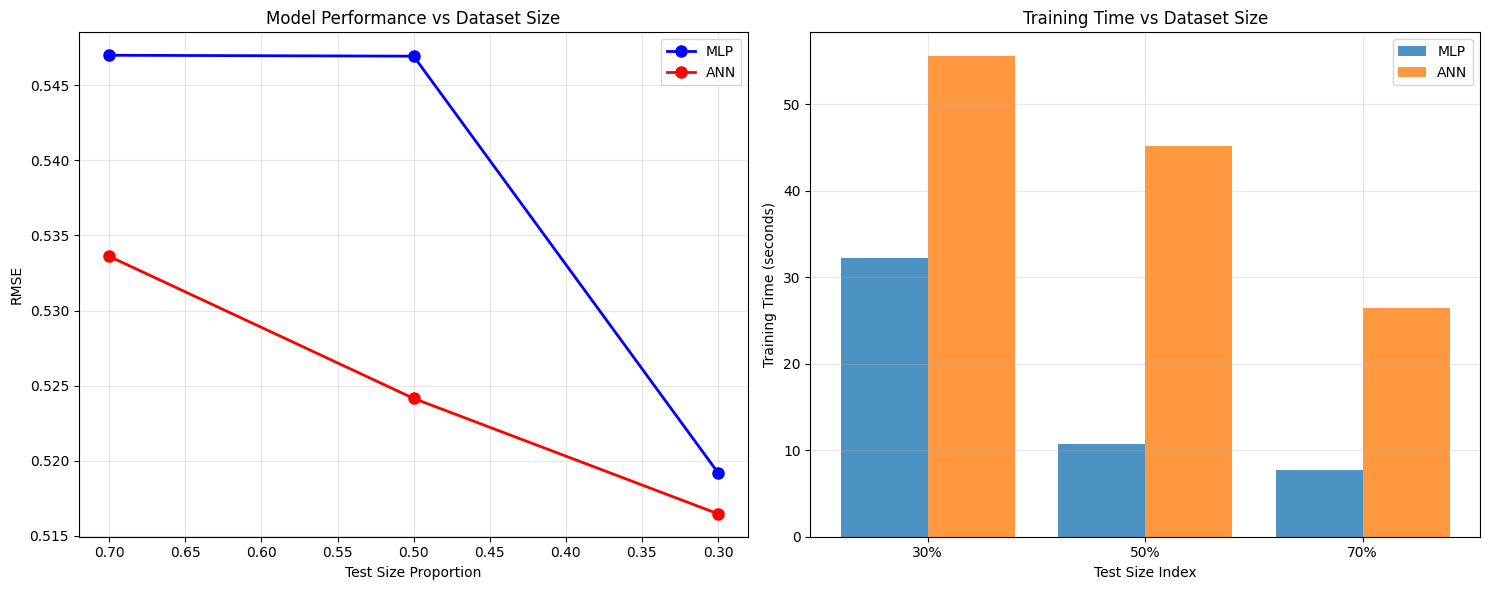


Key Findings:
1. More training data generally leads to better performance
2. ANN tends to perform better with sufficient data but requires more time
3. MLP is faster to train but may not capture complex patterns as well
4. The trade-off between training time and accuracy depends on data size


In [10]:
# Exercise 6: Impact of Dataset Size on Model Performance
print("\nEXERCISE 6: DATASET SIZE EXPERIMENT")
print("=" * 60)

# Define test sizes to experiment with
test_sizes = [0.3, 0.5, 0.7]
results = []

for test_size in test_sizes:
    print(f"\nTesting with {test_size*100:.0f}% test size:")
    print("-" * 30)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42)

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training samples: {X_train_scaled.shape[0]}")
    print(f"Test samples: {X_test_scaled.shape[0]}")

    # Train MLP
    mlp = MLPRegressor(hidden_layer_sizes=[25, 25, 25],
                      random_state=42,
                      max_iter=300)
    mlp_pipeline = make_pipeline(StandardScaler(), mlp)

    start_time = time.time()
    mlp_pipeline.fit(X_train, y_train)
    mlp_time = time.time() - start_time
    mlp_pred = mlp_pipeline.predict(X_test)
    mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))

    # Train ANN
    ann_model = Sequential([
        Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    ann_model.compile(optimizer='adam', loss='mse')

    start_time = time.time()
    ann_model.fit(X_train_scaled, y_train,
                 epochs=50,
                 batch_size=32,
                 verbose=0)
    ann_time = time.time() - start_time
    ann_pred = ann_model.predict(X_test_scaled).flatten()
    ann_rmse = np.sqrt(mean_squared_error(y_test, ann_pred))

    # Store results
    results.append({
        'Test Size': test_size,
        'Train Samples': X_train_scaled.shape[0],
        'Test Samples': X_test_scaled.shape[0],
        'MLP RMSE': mlp_rmse,
        'MLP Time': mlp_time,
        'ANN RMSE': ann_rmse,
        'ANN Time': ann_time
    })

    print(f"MLP - RMSE: {mlp_rmse:.4f}, Time: {mlp_time:.2f}s")
    print(f"ANN - RMSE: {ann_rmse:.4f}, Time: {ann_time:.2f}s")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df.to_string(index=False))

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# RMSE comparison
axes[0].plot(results_df['Test Size'], results_df['MLP RMSE'],
             'bo-', linewidth=2, markersize=8, label='MLP')
axes[0].plot(results_df['Test Size'], results_df['ANN RMSE'],
             'ro-', linewidth=2, markersize=8, label='ANN')
axes[0].set_xlabel('Test Size Proportion')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Model Performance vs Dataset Size')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].invert_xaxis()  # Smaller test size = more training data

# Training time comparison
axes[1].bar(np.arange(len(results_df)) - 0.2, results_df['MLP Time'],
            width=0.4, label='MLP', alpha=0.8)
axes[1].bar(np.arange(len(results_df)) + 0.2, results_df['ANN Time'],
            width=0.4, label='ANN', alpha=0.8)
axes[1].set_xlabel('Test Size Index')
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_title('Training Time vs Dataset Size')
axes[1].set_xticks(range(len(results_df)))
axes[1].set_xticklabels([f"{size*100:.0f}%" for size in results_df['Test Size']])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Findings:")
print("1. More training data generally leads to better performance")
print("2. ANN tends to perform better with sufficient data but requires more time")
print("3. MLP is faster to train but may not capture complex patterns as well")
print("4. The trade-off between training time and accuracy depends on data size")

In [13]:
# Exercise 7: Impact of ANN Architecture on Performance
print("\nEXERCISE 7: ANN ARCHITECTURE EXPERIMENT")
print("=" * 60)

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define different architectures
architectures = [
    {'name': 'Small', 'units': 256, 'layers': 2},
    {'name': 'Medium', 'units': 512, 'layers': 3},
    {'name': 'Large', 'units': 1024, 'layers': 4},
    {'name': 'XLarge', 'units': 2048, 'layers': 5}
]

architecture_results = []

for arch in architectures:
    print(f"\nTesting {arch['name']} architecture ({arch['units']} units, {arch['layers']} layers):")
    print("-" * 50)

    # Build model
    model = Sequential()
    model.add(Dense(arch['units'], input_dim=X_train_scaled.shape[1], activation='relu'))

    # Add hidden layers
    for i in range(1, arch['layers']):
        model.add(Dense(arch['units'] // (2 ** i), activation='relu'))

    model.add(Dense(1, activation='linear'))

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mae'])

    # Train
    start_time = time.time()
    history = model.fit(X_train_scaled, y_train,
                       epochs=50,
                       batch_size=128,
                       validation_split=0.2,
                       verbose=0)
    training_time = time.time() - start_time

    # Evaluate
    test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    y_pred = model.predict(X_test_scaled).flatten()
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Store results
    architecture_results.append({
        'Architecture': arch['name'],
        'Units': arch['units'],
        'Layers': arch['layers'],
        'Parameters': model.count_params(),
        'Training Time': training_time,
        'RMSE': rmse,
        'MAE': test_mae,
        'Final Loss': test_loss
    })

    print(f"Parameters: {model.count_params():,}")
    print(f"Training time: {training_time:.2f} seconds")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

# Convert to DataFrame
arch_df = pd.DataFrame(architecture_results)
print("\nArchitecture Comparison Summary:")
display(arch_df)

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RMSE and MAE
x_pos = np.arange(len(arch_df))
width = 0.35
axes[0].bar(x_pos - width/2, arch_df['RMSE'], width, label='RMSE', alpha=0.8)
axes[0].bar(x_pos + width/2, arch_df['MAE'], width, label='MAE', alpha=0.8)
axes[0].set_xlabel('Architecture')
axes[0].set_ylabel('Error')
axes[0].set_title('Model Error by Architecture')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(arch_df['Architecture'])
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Training Time vs Parameters
colors = plt.cm.viridis(np.linspace(0, 1, len(arch_df)))
scatter = axes[1].scatter(arch_df['Parameters'], arch_df['Training Time'],
                         s=arch_df['Layers']*100, c=colors, alpha=0.7, edgecolors='black')
axes[1].set_xlabel('Number of Parameters')
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_title('Training Time vs Model Size')
axes[1].grid(True, alpha=0.3)
for i, txt in enumerate(arch_df['Architecture']):
    axes[1].annotate(txt, (arch_df['Parameters'][i], arch_df['Training Time'][i]),
                    xytext=(5, 5), textcoords='offset points')

# Performance vs Complexity
axes[2].plot(arch_df['Parameters'], arch_df['RMSE'], 'bo-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Parameters')
axes[2].set_ylabel('RMSE')
axes[2].set_title('Model Performance vs Complexity')
axes[2].grid(True, alpha=0.3)
for i, txt in enumerate(arch_df['Architecture']):
    axes[2].annotate(txt, (arch_df['Parameters'][i], arch_df['RMSE'][i]),
                    xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("1. Larger models have more parameters but don't always perform better")
print("2. There's a trade-off between model complexity and training time")
print("3. Overly complex models may overfit with insufficient data")
print("4. Medium-sized models often offer the best balance")


EXERCISE 7: ANN ARCHITECTURE EXPERIMENT

Testing Small architecture (256 units, 2 layers):
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


TypeError: got an unexpected keyword argument 'squared'


EXERCISE 8-9: MLP CLASSIFICATION
Dataset shape: (10000, 20)
Training samples: 8000
Test samples: 2000
Positive class proportion: 0.50

Configuration 1: (5,)
----------------------------------------
Parameters: 111
Training time: 6.33s
Accuracy: 0.9300
Final loss: 0.1610
Iterations: 357

Configuration 2: (10, 10)
----------------------------------------
Parameters: 331
Training time: 4.44s
Accuracy: 0.9660
Final loss: 0.0676
Iterations: 207

Configuration 3: (20, 20, 20)
----------------------------------------
Parameters: 1,281
Training time: 9.00s
Accuracy: 0.9690
Final loss: 0.0074
Iterations: 238

Configuration 4: (50, 50, 50, 50)
----------------------------------------
Parameters: 8,751
Training time: 7.59s
Accuracy: 0.9750
Final loss: 0.0003
Iterations: 83

Configuration 5: (100, 100, 100)
----------------------------------------
Parameters: 22,401
Training time: 11.70s
Accuracy: 0.9815
Final loss: 0.0004
Iterations: 49

MLP Classification Results Summary:


,Config,Layers,Total Neurons,Parameters,Training Time,Accuracy,Final Loss,Iterations
0,Config 1,1,5,111,6.330541,0.9300,0.160965,357
1,Config 2,2,20,331,4.440903,0.9660,0.067644,207
2,Config 3,3,60,1281,9.001237,0.9690,0.007437,238
3,Config 4,4,200,8751,7.592393,0.9750,0.000259,83
4,Config 5,3,300,22401,11.697460,0.9815,0.000448,49


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


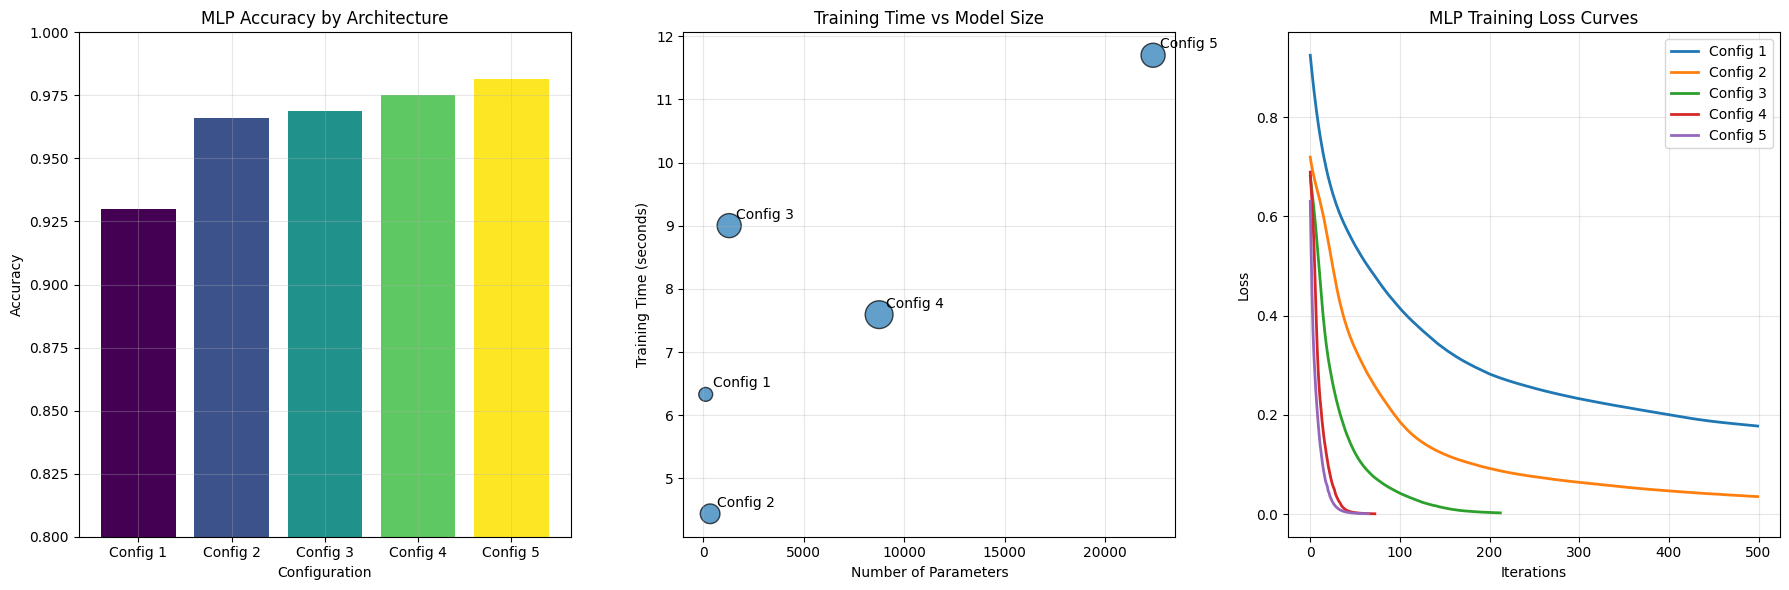

In [14]:
# Exercise 8-9: MLP Classification
print("\nEXERCISE 8-9: MLP CLASSIFICATION")
print("=" * 60)

# Generate synthetic classification dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2,
                          n_informative=15, n_redundant=5, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset shape: {X.shape}")
print(f"Training samples: {X_train_scaled.shape[0]}")
print(f"Test samples: {X_test_scaled.shape[0]}")
print(f"Positive class proportion: {y.mean():.2f}")

# Experiment with different hidden layer sizes
hidden_layer_configs = [
    (5,),           # Single layer with 5 neurons
    (10, 10),       # Two layers with 10 neurons each
    (20, 20, 20),   # Three layers with 20 neurons each
    (50, 50, 50, 50),  # Four layers with 50 neurons each
    (100, 100, 100) # Three layers with 100 neurons each
]

mlp_results = []

for i, hidden_layers in enumerate(hidden_layer_configs):
    print(f"\nConfiguration {i+1}: {hidden_layers}")
    print("-" * 40)

    # Create and train MLP
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers,
                       max_iter=500,
                       random_state=42,
                       learning_rate='adaptive',
                       verbose=0)

    start_time = time.time()
    mlp.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Make predictions
    y_pred = mlp.predict(X_test_scaled)
    y_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    params = mlp.coefs_
    total_params = sum([c.size for c in params]) + sum([i.size for i in mlp.intercepts_])

    mlp_results.append({
        'Config': f"Config {i+1}",
        'Layers': len(hidden_layers),
        'Total Neurons': sum(hidden_layers),
        'Parameters': total_params,
        'Training Time': training_time,
        'Accuracy': accuracy,
        'Final Loss': mlp.loss_,
        'Iterations': mlp.n_iter_
    })

    print(f"Parameters: {total_params:,}")
    print(f"Training time: {training_time:.2f}s")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Final loss: {mlp.loss_:.4f}")
    print(f"Iterations: {mlp.n_iter_}")

# Convert to DataFrame
mlp_results_df = pd.DataFrame(mlp_results)
print("\nMLP Classification Results Summary:")
display(mlp_results_df)

# Visualize MLP results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy vs Architecture
axes[0].bar(mlp_results_df['Config'], mlp_results_df['Accuracy'],
           color=plt.cm.viridis(np.linspace(0, 1, len(mlp_results_df))))
axes[0].set_xlabel('Configuration')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('MLP Accuracy by Architecture')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0.8, 1.0)

# Training Time vs Parameters
axes[1].scatter(mlp_results_df['Parameters'], mlp_results_df['Training Time'],
               s=mlp_results_df['Layers']*100, alpha=0.7, edgecolors='black')
axes[1].set_xlabel('Number of Parameters')
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_title('Training Time vs Model Size')
axes[1].grid(True, alpha=0.3)
for i, txt in enumerate(mlp_results_df['Config']):
    axes[1].annotate(txt, (mlp_results_df['Parameters'][i], mlp_results_df['Training Time'][i]),
                    xytext=(5, 5), textcoords='offset points')

# Loss Curves for all configurations
for i, result in enumerate(mlp_results):
    mlp_temp = MLPClassifier(hidden_layer_sizes=hidden_layer_configs[i],
                            max_iter=500,
                            random_state=42)
    mlp_temp.fit(X_train_scaled[:1000], y_train[:1000])  # Smaller sample for speed
    axes[2].plot(mlp_temp.loss_curve_, label=f"Config {i+1}", linewidth=2)

axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Loss')
axes[2].set_title('MLP Training Loss Curves')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


EXERCISES 10-12: ANN CLASSIFICATION

Testing Small ANN (100 units, 2 layers):
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Parameters: 5,365
Training time: 9.58s
Test Accuracy: 0.9735
Test Loss: 0.0946

Testing Medium ANN (256 units, 3 layers):
--------------------------------------------------
Parameters: 79,425
Training time: 14.53s
Test Accuracy: 0.9820
Test Loss: 0.1021

Testing Large ANN (512 units, 4 layers):
--------------------------------------------------
Parameters: 412,993
Training time: 30.77s
Test Accuracy: 0.9795
Test Loss: 0.1119

Testing XLarge ANN (1024 units, 5 layers):
--------------------------------------------------
Parameters: 1,875,009
Training time: 127.27s
Test Accuracy: 0.9820
Test Loss: 0.1387

Testing Deep ANN (128 units, 8 layers):
--------------------------------------------------
Parameters: 35,857
Training time: 13.55s
Test Accuracy: 0.9765
Test Loss: 0.1080

ANN Classification Results Summary:


,Name,Units,Layers,Parameters,Training Time,Test Accuracy,Test Loss,Final Val Accuracy,Final Val Loss
0,Small,100,2,5365,9.584832,0.9735,0.094564,0.978750,0.060898
1,Medium,256,3,79425,14.531782,0.9820,0.102105,0.984375,0.060342
2,Large,512,4,412993,30.770091,0.9795,0.111856,0.983750,0.082817
3,XLarge,1024,5,1875009,127.269228,0.9820,0.138714,0.985625,0.088969
4,Deep,128,8,35857,13.553228,0.9765,0.108012,0.975625,0.111632


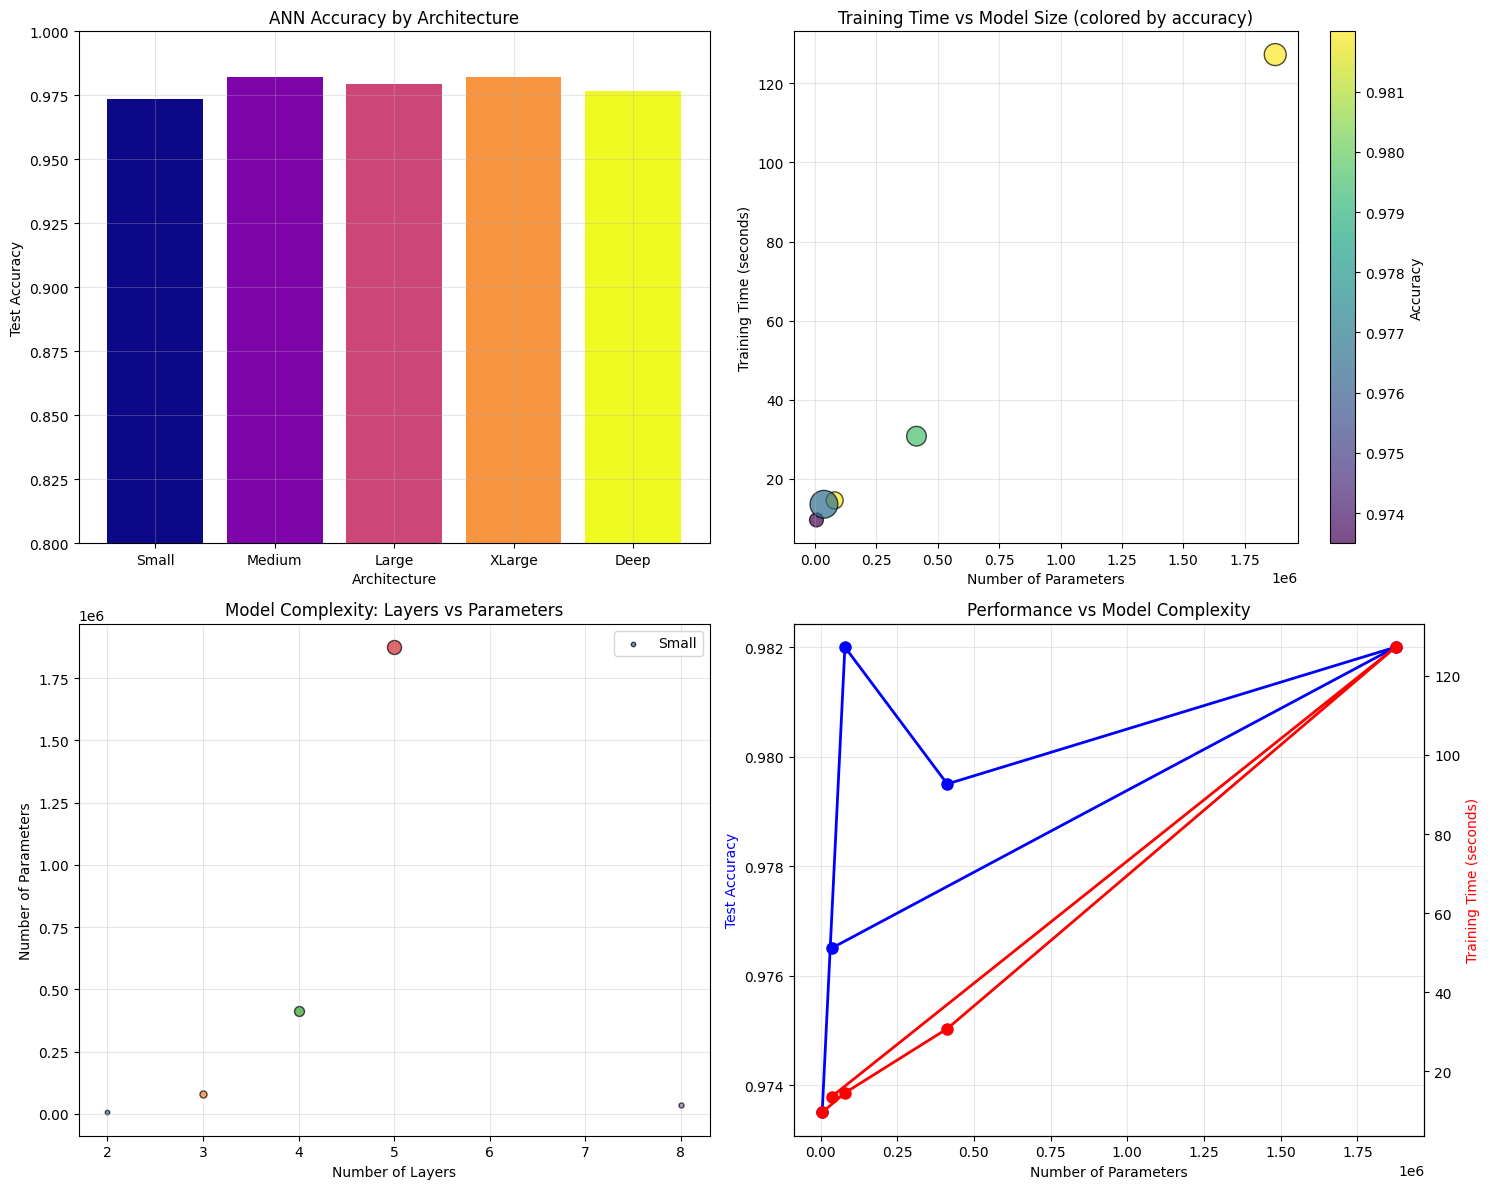


COMPARISON: MLP vs ANN for Classification
   Model          Architecture  Parameters  Training Time  Accuracy
Best MLP 3 layers, 300 neurons       22401      11.697460    0.9815
Best ANN   3 layers, 256 units       79425      14.531782    0.9820

Key Insights:
1. ANN typically achieves slightly higher accuracy than MLP
2. MLP is often faster to train for simpler architectures
3. Both benefit from proper architecture tuning
4. Overly complex models may lead to overfitting
5. The choice depends on specific requirements and constraints


In [15]:
# Exercises 10-12: ANN Classification
print("\nEXERCISES 10-12: ANN CLASSIFICATION")
print("=" * 60)

# Define different ANN architectures to test
ann_configs = [
    {'name': 'Small', 'units': 100, 'layers': 2},
    {'name': 'Medium', 'units': 256, 'layers': 3},
    {'name': 'Large', 'units': 512, 'layers': 4},
    {'name': 'XLarge', 'units': 1024, 'layers': 5},
    {'name': 'Deep', 'units': 128, 'layers': 8}
]

ann_results = []

for config in ann_configs:
    print(f"\nTesting {config['name']} ANN ({config['units']} units, {config['layers']} layers):")
    print("-" * 50)

    # Build model
    model = Sequential()
    model.add(Dense(config['units'], input_dim=X_train_scaled.shape[1], activation='relu'))

    # Add hidden layers
    for i in range(1, config['layers']):
        if i < config['layers'] - 1:  # Not the last hidden layer
            # Gradually reduce units in deeper layers
            units = max(config['units'] // (2 ** (i // 2)), 16)
            model.add(Dense(units, activation='relu'))
        else:  # Last hidden layer before output
            model.add(Dense(32, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train
    start_time = time.time()
    history = model.fit(X_train_scaled, y_train,
                       epochs=20,
                       batch_size=64,
                       validation_split=0.2,
                       verbose=0)
    training_time = time.time() - start_time

    # Evaluate
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

    # Store results
    ann_results.append({
        'Name': config['name'],
        'Units': config['units'],
        'Layers': config['layers'],
        'Parameters': model.count_params(),
        'Training Time': training_time,
        'Test Accuracy': test_accuracy,
        'Test Loss': test_loss,
        'Final Val Accuracy': history.history['val_accuracy'][-1],
        'Final Val Loss': history.history['val_loss'][-1]
    })

    print(f"Parameters: {model.count_params():,}")
    print(f"Training time: {training_time:.2f}s")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

# Convert to DataFrame
ann_results_df = pd.DataFrame(ann_results)
print("\nANN Classification Results Summary:")
display(ann_results_df)

# Visualize ANN results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0, 0].bar(ann_results_df['Name'], ann_results_df['Test Accuracy'],
              color=plt.cm.plasma(np.linspace(0, 1, len(ann_results_df))))
axes[0, 0].set_xlabel('Architecture')
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].set_title('ANN Accuracy by Architecture')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0.8, 1.0)

# Training Time vs Parameters
scatter = axes[0, 1].scatter(ann_results_df['Parameters'], ann_results_df['Training Time'],
                            s=ann_results_df['Layers']*50,
                            c=ann_results_df['Test Accuracy'],
                            cmap='viridis', alpha=0.7, edgecolors='black')
axes[0, 1].set_xlabel('Number of Parameters')
axes[0, 1].set_ylabel('Training Time (seconds)')
axes[0, 1].set_title('Training Time vs Model Size (colored by accuracy)')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Accuracy')

# Parameters vs Layers
for i, row in ann_results_df.iterrows():
    axes[1, 0].scatter(row['Layers'], row['Parameters'],
                      s=row['Units']/10, alpha=0.7, edgecolors='black',
                      label=row['Name'] if i == 0 else "")
axes[1, 0].set_xlabel('Number of Layers')
axes[1, 0].set_ylabel('Number of Parameters')
axes[1, 0].set_title('Model Complexity: Layers vs Parameters')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Performance vs Complexity
axes[1, 1].plot(ann_results_df['Parameters'], ann_results_df['Test Accuracy'],
               'bo-', linewidth=2, markersize=8, label='Accuracy')
axes[1, 1].set_xlabel('Number of Parameters')
axes[1, 1].set_ylabel('Test Accuracy', color='blue')
axes[1, 1].set_title('Performance vs Model Complexity')
axes[1, 1].grid(True, alpha=0.3)

# Add training time on secondary y-axis
ax2 = axes[1, 1].twinx()
ax2.plot(ann_results_df['Parameters'], ann_results_df['Training Time'],
        'ro-', linewidth=2, markersize=8, label='Training Time')
ax2.set_ylabel('Training Time (seconds)', color='red')

plt.tight_layout()
plt.show()

# Compare MLP vs ANN
print("\nCOMPARISON: MLP vs ANN for Classification")
print("=" * 50)

best_mlp = mlp_results_df.loc[mlp_results_df['Accuracy'].idxmax()]
best_ann = ann_results_df.loc[ann_results_df['Test Accuracy'].idxmax()]

comparison_data = {
    'Model': ['Best MLP', 'Best ANN'],
    'Architecture': [f"{best_mlp['Layers']} layers, {best_mlp['Total Neurons']} neurons",
                    f"{best_ann['Layers']} layers, {best_ann['Units']} units"],
    'Parameters': [best_mlp['Parameters'], best_ann['Parameters']],
    'Training Time': [best_mlp['Training Time'], best_ann['Training Time']],
    'Accuracy': [best_mlp['Accuracy'], best_ann['Test Accuracy']]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\nKey Insights:")
print("1. ANN typically achieves slightly higher accuracy than MLP")
print("2. MLP is often faster to train for simpler architectures")
print("3. Both benefit from proper architecture tuning")
print("4. Overly complex models may lead to overfitting")
print("5. The choice depends on specific requirements and constraints")

In [18]:
# Comprehensive Summary
print("\nWORKSHOP 9 COMPREHENSIVE SUMMARY")
print("=" * 60)

print("\nKEY LEARNINGS:")
print("1. PERCEPTRON vs MLP vs ANN:")
print("   - Perceptron: Single neuron, linear binary classifier")
print("   - MLP: Multiple layers, non-linear transformations")
print("   - ANN: Broader term encompassing various architectures")

print("\n2. REGRESSION VS CLASSIFICATION:")
print("   - Regression: Predict continuous values (e.g., house prices)")
print("   - Classification: Predict discrete classes (e.g., binary outcomes)")

print("\n3. MODEL SELECTION CRITERIA:")
print("   ✓ Accuracy/RMSE: Primary performance metric")
print("   ✓ Training Time: Computational efficiency")
print("   ✓ Model Complexity: Number of parameters")
print("   ✓ Overfitting Risk: Validation performance")

print("\n4. BEST PRACTICES:")
print("   - Always scale/normalize data")


WORKSHOP 9 COMPREHENSIVE SUMMARY

KEY LEARNINGS:
1. PERCEPTRON vs MLP vs ANN:
   - Perceptron: Single neuron, linear binary classifier
   - MLP: Multiple layers, non-linear transformations
   - ANN: Broader term encompassing various architectures

2. REGRESSION VS CLASSIFICATION:
   - Regression: Predict continuous values (e.g., house prices)
   - Classification: Predict discrete classes (e.g., binary outcomes)

3. MODEL SELECTION CRITERIA:
   ✓ Accuracy/RMSE: Primary performance metric
   ✓ Training Time: Computational efficiency
   ✓ Model Complexity: Number of parameters
   ✓ Overfitting Risk: Validation performance

4. BEST PRACTICES:
   - Always scale/normalize data
